In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_phones = pd.DataFrame(data={
    'brand': ['Samsung', 'Huawei', 'Apple', 'Xiaomi', 'OPPO', 'Other'],
    'share': [0.2090, 0.1580, 0.1210, 0.0930, 0.0870, 0.3320]
})

df_phones

,brand,share
0,Samsung,0.209
1,Huawei,0.158
2,Apple,0.121
3,Xiaomi,0.093
4,OPPO,0.087
5,Other,0.332


In [3]:
df_phones.share.sum()

1.0

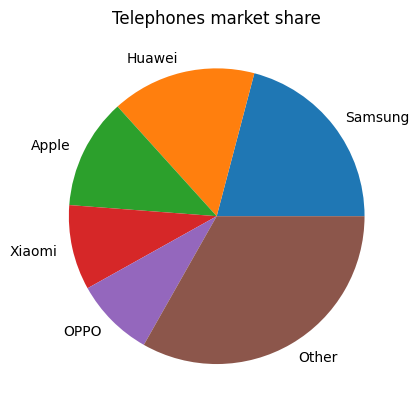

In [4]:
# Pie plot
plt.pie(x=df_phones['share'], labels=df_phones['brand'])
plt.title('Telephones market share')
plt.show()

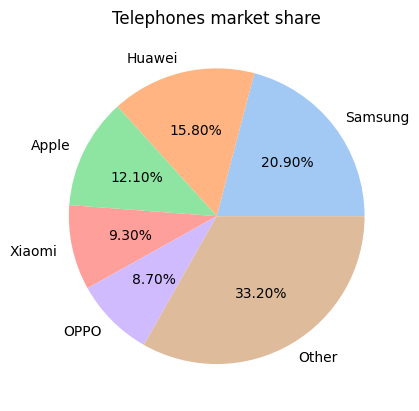

In [5]:
# Pie plot with full description
plt.pie(
    x=df_phones['share'], 
    labels=df_phones['brand'],
    colors=sns.color_palette('pastel'),
    autopct='%.2f%%'
)
plt.title('Telephones market share')
plt.show()

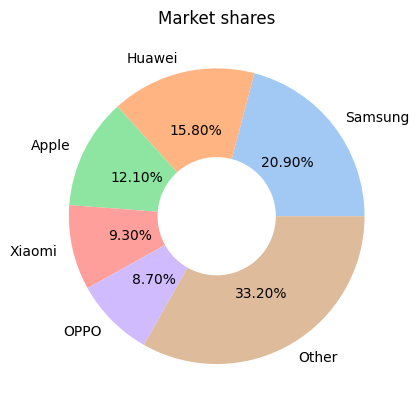

In [6]:
# Circle diagram
plt.pie(x=df_phones['share'], labels=df_phones['brand'], colors=sns.color_palette('pastel'), autopct='%.2f%%')
centre = plt.Circle(xy=(0, 0), radius=0.4, fc='white')
fig = plt.gcf()  # Get the current figure
fig.gca().add_artist(centre)  # Get the current Axes
plt.title('Market shares')
plt.show()

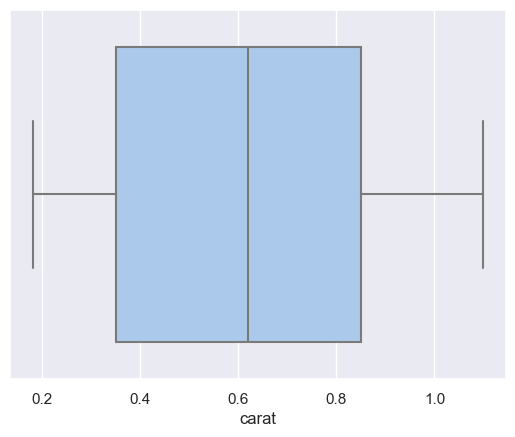

In [7]:
# Box plot
diamonds = pd.read_csv('Diamond.csv')
sns.set_theme(palette='pastel')
sns.boxplot(x='carat', data=diamonds);

In [8]:
diamonds.head()

,carat,colour,clarity,certification,price
0,0.30,D,VS2,GIA,1302
1,0.30,E,VS1,GIA,1510
2,0.30,G,VVS1,GIA,1510
3,0.30,G,VS1,GIA,1260
4,0.31,D,VS1,GIA,1641


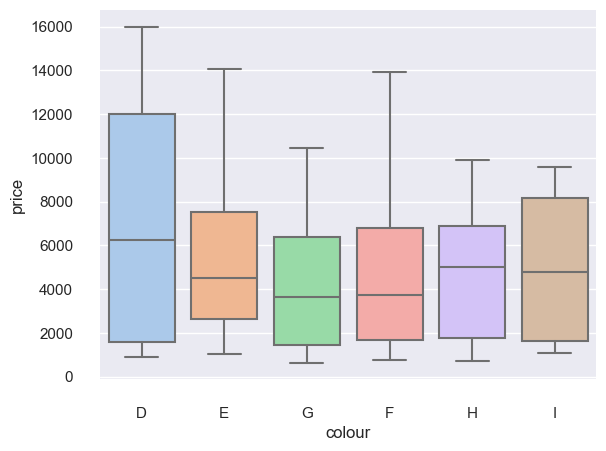

In [9]:
sns.boxplot(y='price', x='colour', data=diamonds)
sns.despine(offset=10, trim=True);

**sns.despine(offset=10, trim=True)** используется для настройки стиля графика, чтобы сделать его более чистым и аккуратным, с удалением части осей с определенным отступом от графика и обрезанием до точек данных. Это часто используется для улучшения визуальной привлекательности графиков, чтобы сосредоточить внимание на самой информации на графике.

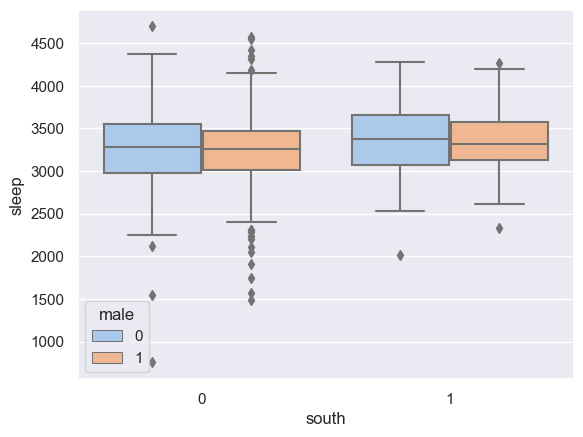

In [10]:
sleep = pd.read_csv('sleep75.csv')
sns.boxplot(y='sleep', hue='male', x='south', data=sleep);

In [11]:
sleep.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.530000,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


# Correlation visualization

In [12]:
reduced = sleep.drop(columns=['hrwage', 'agesq', 'leis1', 'leis2', 'leis3', 'exper'])
small = sleep[['sleep', 'totwrk', 'age', 'educ', 'yrsmarr']]

In [13]:
# Correlation matrix
small.corr().round(3)

,sleep,totwrk,age,educ,yrsmarr
sleep,1.000,-0.321,0.090,-0.095,0.064
totwrk,-0.321,1.000,-0.050,0.033,-0.088
age,0.090,-0.050,1.000,-0.266,0.594
educ,-0.095,0.033,-0.266,1.000,-0.175
yrsmarr,0.064,-0.088,0.594,-0.175,1.000


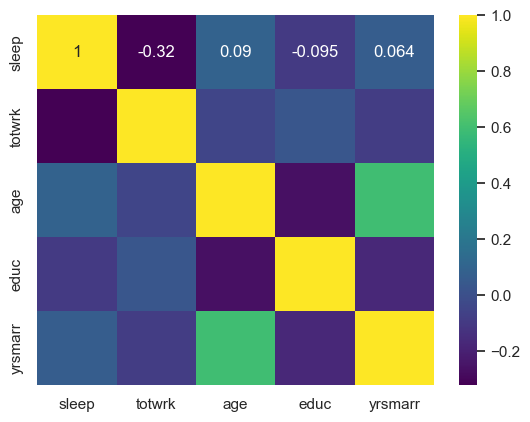

In [14]:
# Heatmap
sns.heatmap(small.corr(), annot=True, cmap='viridis');

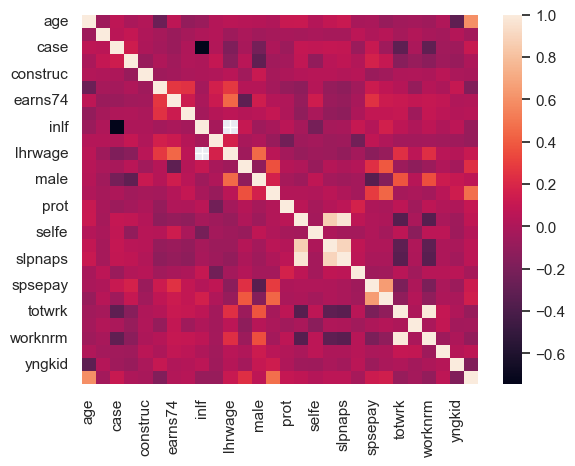

In [15]:
sns.heatmap(reduced.corr());

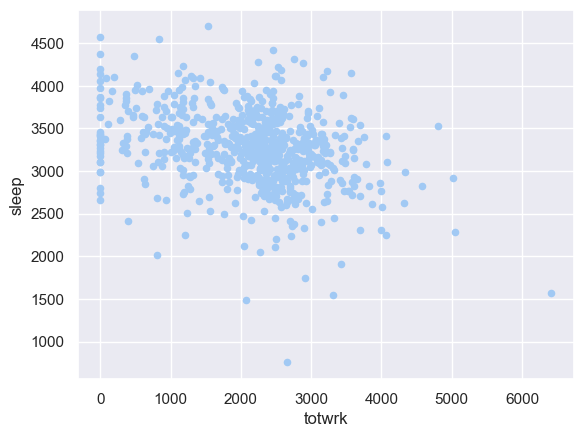

In [16]:
# Scatter plot
sleep.plot.scatter(x='totwrk', y='sleep');

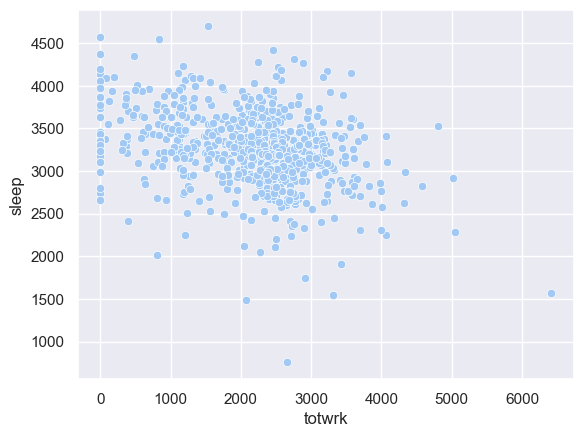

In [17]:
# Scatter in Seaborn
sns.scatterplot(data=sleep, x='totwrk', y='sleep');

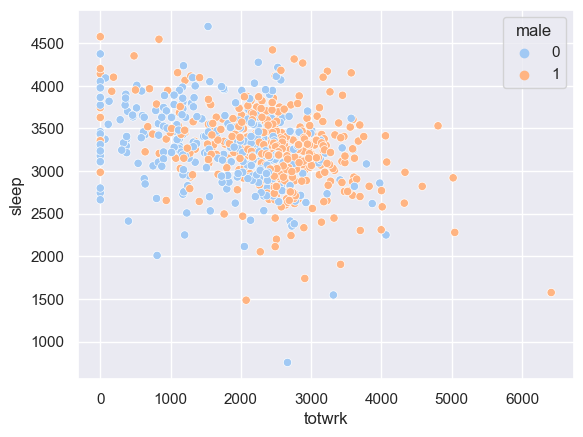

In [18]:
# For two sex
sns.scatterplot(data=sleep, x='totwrk', y='sleep', hue='male');

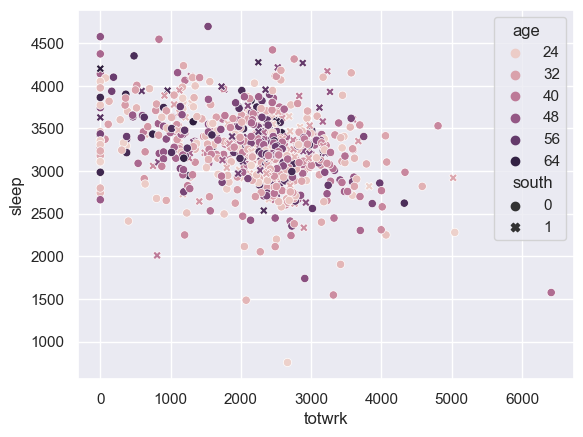

In [19]:
# Color and shape are different
sns.scatterplot(data=sleep, x='totwrk', y='sleep', hue='age', style='south');

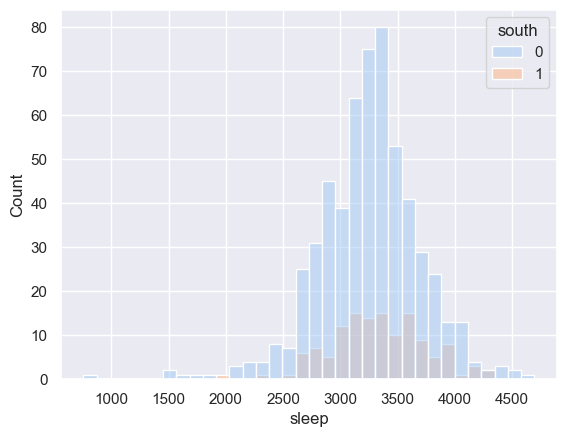

In [20]:
# Histograms
sns.histplot(data=sleep, x='sleep', hue='south');

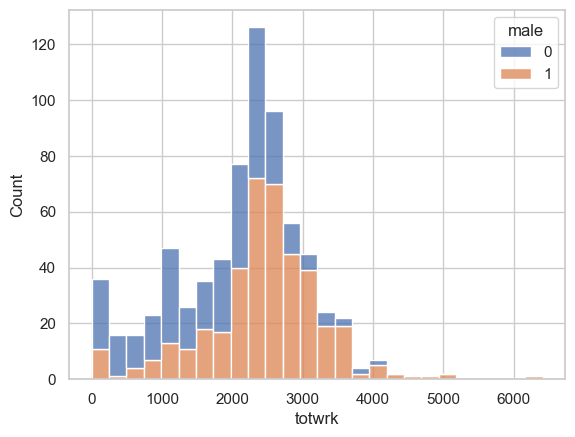

In [21]:
sns.set_theme(style='whitegrid')
sns.histplot(data=sleep, x='totwrk', hue='male', multiple='stack');

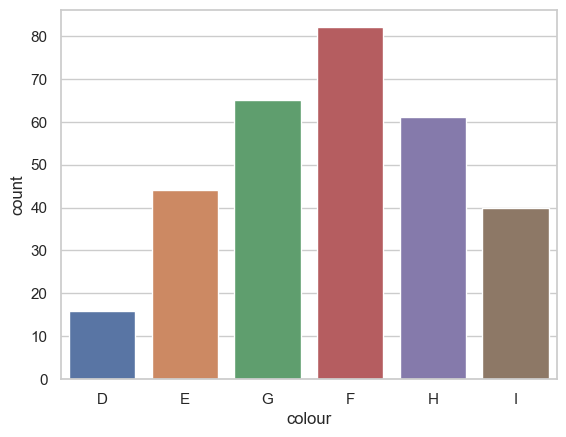

In [22]:
# Count plot
sns.countplot(data=diamonds, x='colour');

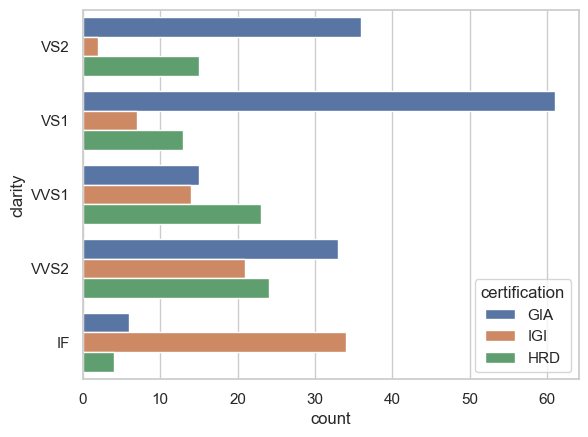

In [23]:
sns.countplot(data=diamonds, y='clarity', hue='certification', dodge=True);

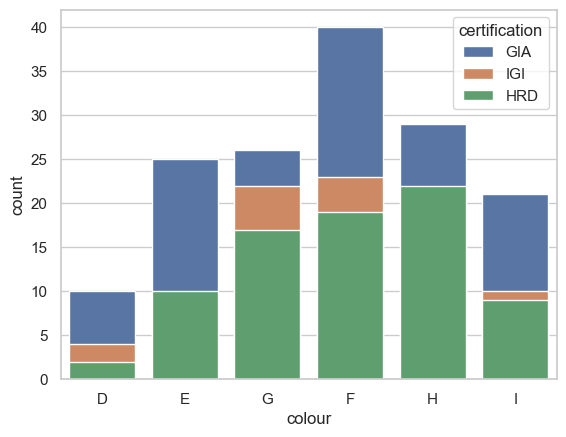

In [24]:
sns.countplot(data=diamonds, x='colour', hue='certification', dodge=False);

# PCA

In [25]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [26]:
labour = pd.read_csv('Labour.csv')
labour.head()

,capital,labour,output,wage
0,2.606563,184,9.250759,43.080307
1,1.323237,91,3.664310,27.780016
2,22.093692,426,28.781516,44.467748
3,10.737851,72,4.124642,39.734710
4,1.161365,46,2.890150,34.650709


### Before PCA let's normalise our data

In [27]:
# Transform the data
rescaled = preprocessing.StandardScaler().fit_transform(labour)

In [28]:
rescaled

array([[-0.11074081, -0.02793462, -0.08725208,  0.3081955 ],
       [-0.12669305, -0.18003013, -0.17638663, -0.75207543],
       [ 0.1314916 ,  0.36784079,  0.2243708 ,  0.40434155],
       ...,
       [-0.11885405, -0.1375088 , -0.13526038,  0.17470588],
       [-0.1267516 , -0.25362473, -0.1087684 ,  1.94637516],
       [-0.10793369, -0.06554964, -0.12628997, -0.13959569]])

In [29]:
# Explained ratio
pca = PCA(n_components=4).fit(rescaled)
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.74547005 0.21370427 0.03751016 0.00331552]
[0.74547005 0.95917433 0.99668448 1.        ]


In [30]:
# Create new dataframe with PCA
data_pca = PCA(n_components=2).fit_transform(rescaled)
df_pca = pd.DataFrame(data=data_pca, columns=[f'component {index + 1}' for index in range(2)])
df_pca

,component 1,component 2
0,-0.043792,0.326780
1,-0.470117,-0.646199
2,0.509464,0.266476
3,-0.196832,0.136307
4,-0.390992,-0.172025
...,...,...
564,-0.439293,-0.241378
565,-0.538801,-0.731424
566,-0.171144,0.228369
567,0.250478,1.951735


# Clusterization and K-Means

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Split dataset into 3 clusters

In [32]:
np.random.seed(26)
kmeans = KMeans(n_clusters=3, init='random')
kmeans.fit(rescaled)
print(kmeans.labels_)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 2 1 1 2 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 2 1 1 1 1
 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1
 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1
 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 2 1 1 1
 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2
 1 1 1 1 2 2 1 1 1 1 2 1 2 2 1 1 1 1 2 1 2 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 2 1 1 2 2 1 1 1 1 1 1 1 

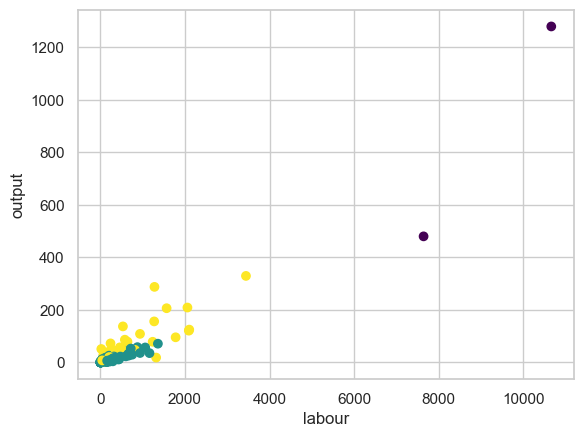

In [33]:
plt.scatter(x=labour['labour'], y=labour['output'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('labour')
plt.ylabel('output');

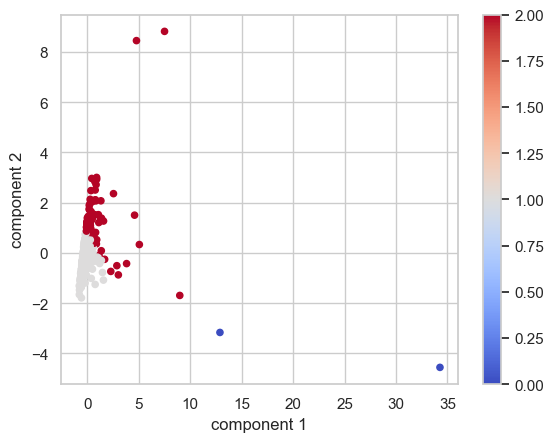

In [34]:
# Visualize PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(rescaled)
df_pca = pd.DataFrame(data=data_pca, columns=['component 1', 'component 2'])
df_pca.plot.scatter(x='component 1', y='component 2', c=kmeans.labels_, colormap='coolwarm');

In [35]:
from sklearn.cluster import AgglomerativeClustering
np.random.seed(26)

hier = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
hier.fit(rescaled)
print(hier.labels_)

[2 1 2 1 1 0 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1
 2 1 1 2 1 1 2 2 2 2 1 2 2 1 2 2 0 2 0 1 1 1 1 1 2 2 2 1 2 1 1 1 2 1 2 1 2
 1 1 1 2 1 1 2 1 1 2 2 2 1 1 2 2 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 2 1 2 1 1
 2 2 1 2 1 1 2 1 2 1 1 1 1 1 2 1 1 0 1 1 1 2 1 1 2 2 1 1 2 1 2 2 1 2 1 2 1
 2 1 1 1 1 1 1 2 2 1 2 1 1 2 1 1 1 2 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 2 1 1
 1 1 0 2 1 2 1 1 2 2 2 1 1 1 1 1 2 2 1 2 2 2 1 2 1 1 2 1 1 1 1 2 2 1 1 2 2
 2 1 2 1 2 1 1 1 2 1 2 2 1 1 1 1 2 1 2 1 1 1 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 2 2 2 1 2 0 1 2 2 2 1 2 1
 1 2 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 2 2 2 1 1 2 1 1 1 2 1 2
 1 1 2 1 2 2 1 2 1 2 0 1 2 2 1 1 1 1 2 1 2 2 1 1 1 1 3 2 2 1 1 1 1 1 2 1 1
 1 1 2 1 2 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 2 2 2 1 1 2 1 2 2 1 1 1 1 2 2 2 1
 2 2 1 2 2 1 1 1 1 2 2 1 1 1 0 1 1 1 2 2 1 2 1 2 2 2 1 1 1 1 1 1 2 1 2 1 1
 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1
 2 1 2 2 2 1 2 1 1 1 1 2 

C:\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


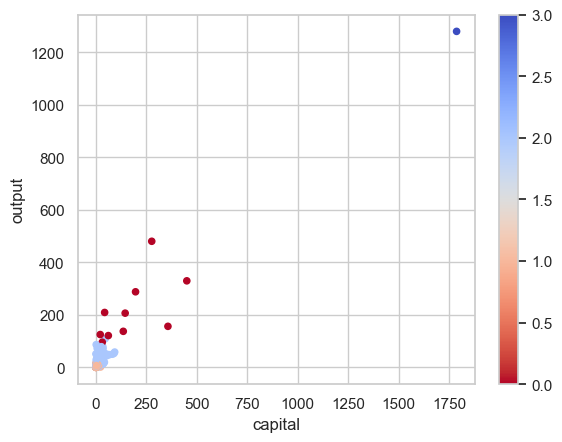

In [36]:
labour.plot.scatter('capital', 'output', c=hier.labels_, colormap='coolwarm_r');

### Dendrogram plot

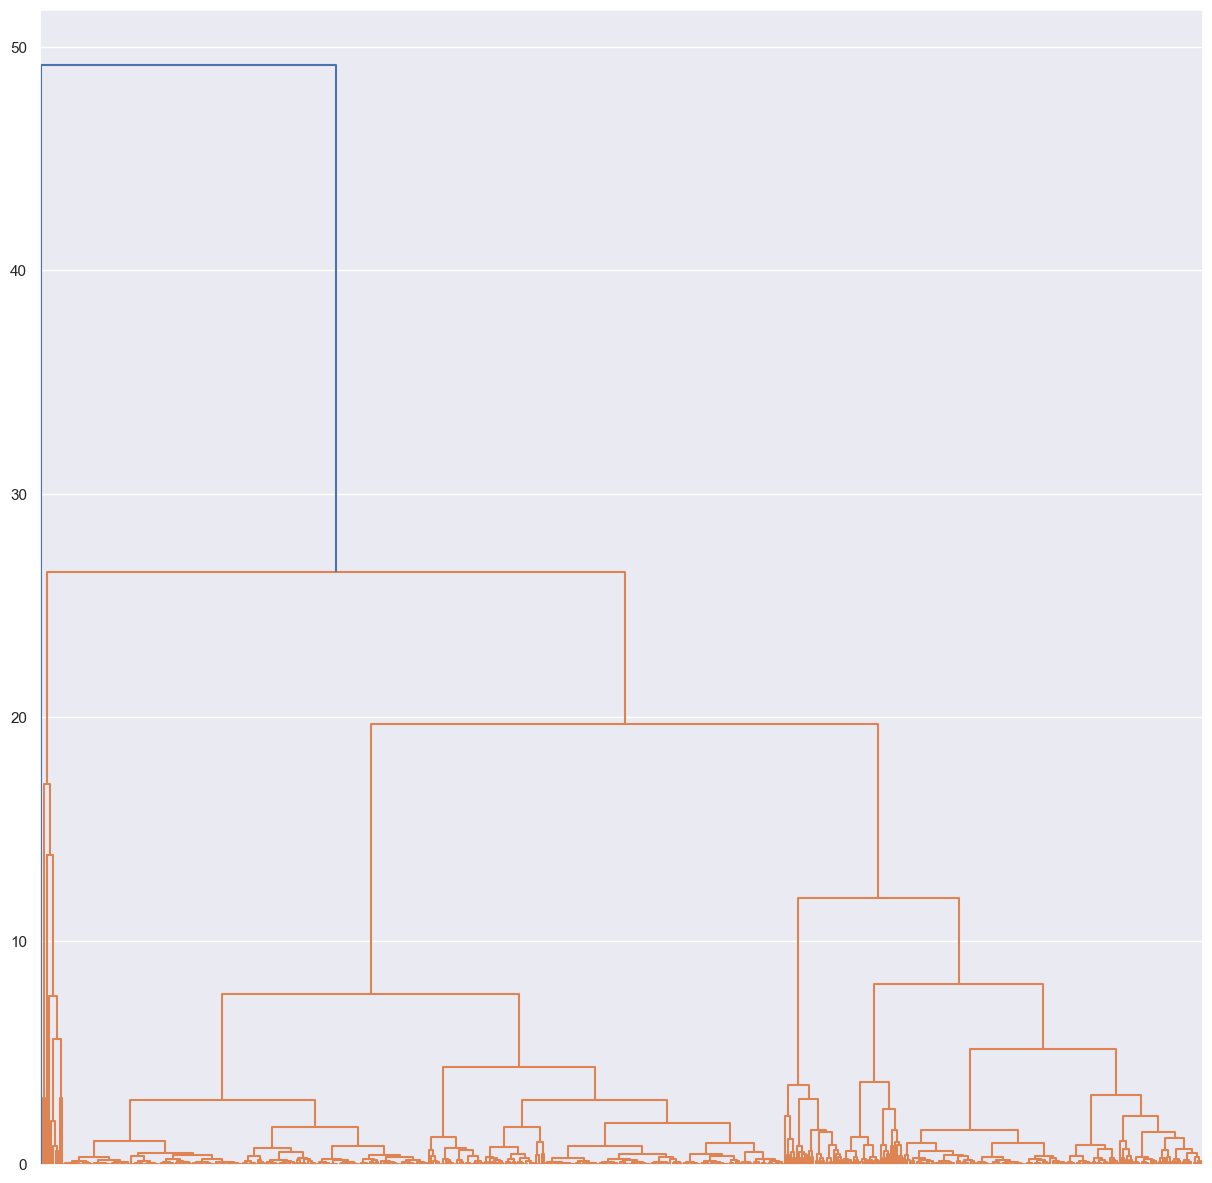

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(rescaled, method='ward')
sns.set(rc={'figure.figsize': (15, 15)})
dendrogram(mergings, no_labels=True)
plt.show();

# Hypothessis testing in Python

In [38]:
import scipy.stats as scs
import statsmodels.stats.diagnostic as sm
import pingouin as pg

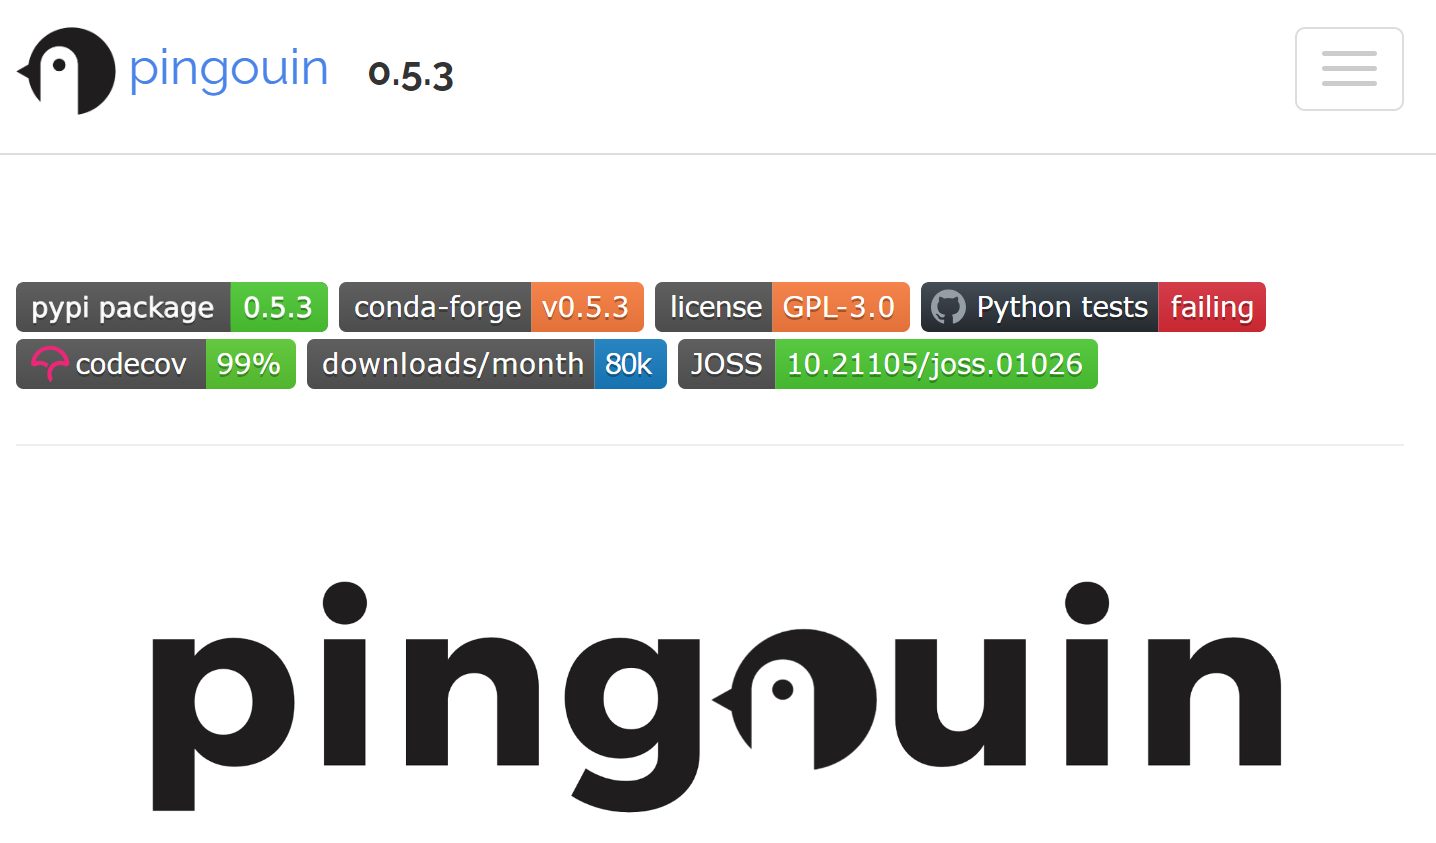

### One-sample t-test

In [39]:
# H0: u=3200 sleep, 5%
t_stat, p_val = scs.ttest_1samp(a=sleep['sleep'], popmean=3200)
t_stat, p_val

(3.9672744144153147, 8.013385140555246e-05)

In [40]:
# Critical value
scs.t.ppf(q=(1 - 0.05 / 2),  df=sleep['sleep'].shape[0] - 1)

1.9633345943574534

In [41]:
# Great info
pg.ttest(x=sleep['sleep'], y=3200)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.967274,705,two-sided,0.00008,"[3233.52, 3299.19]",0.14931,98.426,0.977352


# Task 1

In [42]:
# H0: u=2400 sleep, 1%
t_stat, p_val = scs.ttest_1samp(a=sleep['totwrk'], popmean=2400)
print(t_stat, p_val)
scs.t.ppf(q=(1 - 0.01 / 2),  df=sleep['totwrk'].shape[0] - 1)

-7.770356418617844 2.770669311540709e-14


2.58282093992394

### Two-samples t-test

In [43]:
# Using scipy.stats
X = sleep[sleep['male'] == 1]['sleep']
Y = sleep[sleep['male'] == 0]['sleep']

t_stat, p_val = scs.ttest_ind(a=X, b=Y, equal_var=False)
t_stat, p_val

(-0.9474052094024158, 0.34378977584461323)

In [44]:
# Using pengouin
pg.ttest(x=X, y=Y)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.947405,640.242596,two-sided,0.34379,"[-98.88, 34.52]",0.072407,0.132,0.158552


## Correlation importance

In [45]:
sleep.columns.tolist()

['age',
 'black',
 'case',
 'clerical',
 'construc',
 'educ',
 'earns74',
 'gdhlth',
 'inlf',
 'leis1',
 'leis2',
 'leis3',
 'smsa',
 'lhrwage',
 'lothinc',
 'male',
 'marr',
 'prot',
 'rlxall',
 'selfe',
 'sleep',
 'slpnaps',
 'south',
 'spsepay',
 'spwrk75',
 'totwrk',
 'union',
 'worknrm',
 'workscnd',
 'exper',
 'yngkid',
 'yrsmarr',
 'hrwage',
 'agesq']

In [46]:
# Using scipy.stats
r, p_val = scs.pearsonr(x=sleep['educ'], y=sleep['totwrk'])
r, p_val

(0.032604217003770565, 0.3870330433255682)

In [47]:
# Using pengouin
pg.corr(x=sleep['sleep'], y=sleep['totwrk'])

,n,r,CI95%,p-val,BF10,power
pearson,706,-0.321384,"[-0.39, -0.25]",1.994095e-18,1.961e+15,1.0


### 1-sample Kolmogorov-Smirnov test

In [48]:
sm.lilliefors(x=sleep['sleep'], dist='norm')

(0.046880441069508394, 0.0015723943766754293)

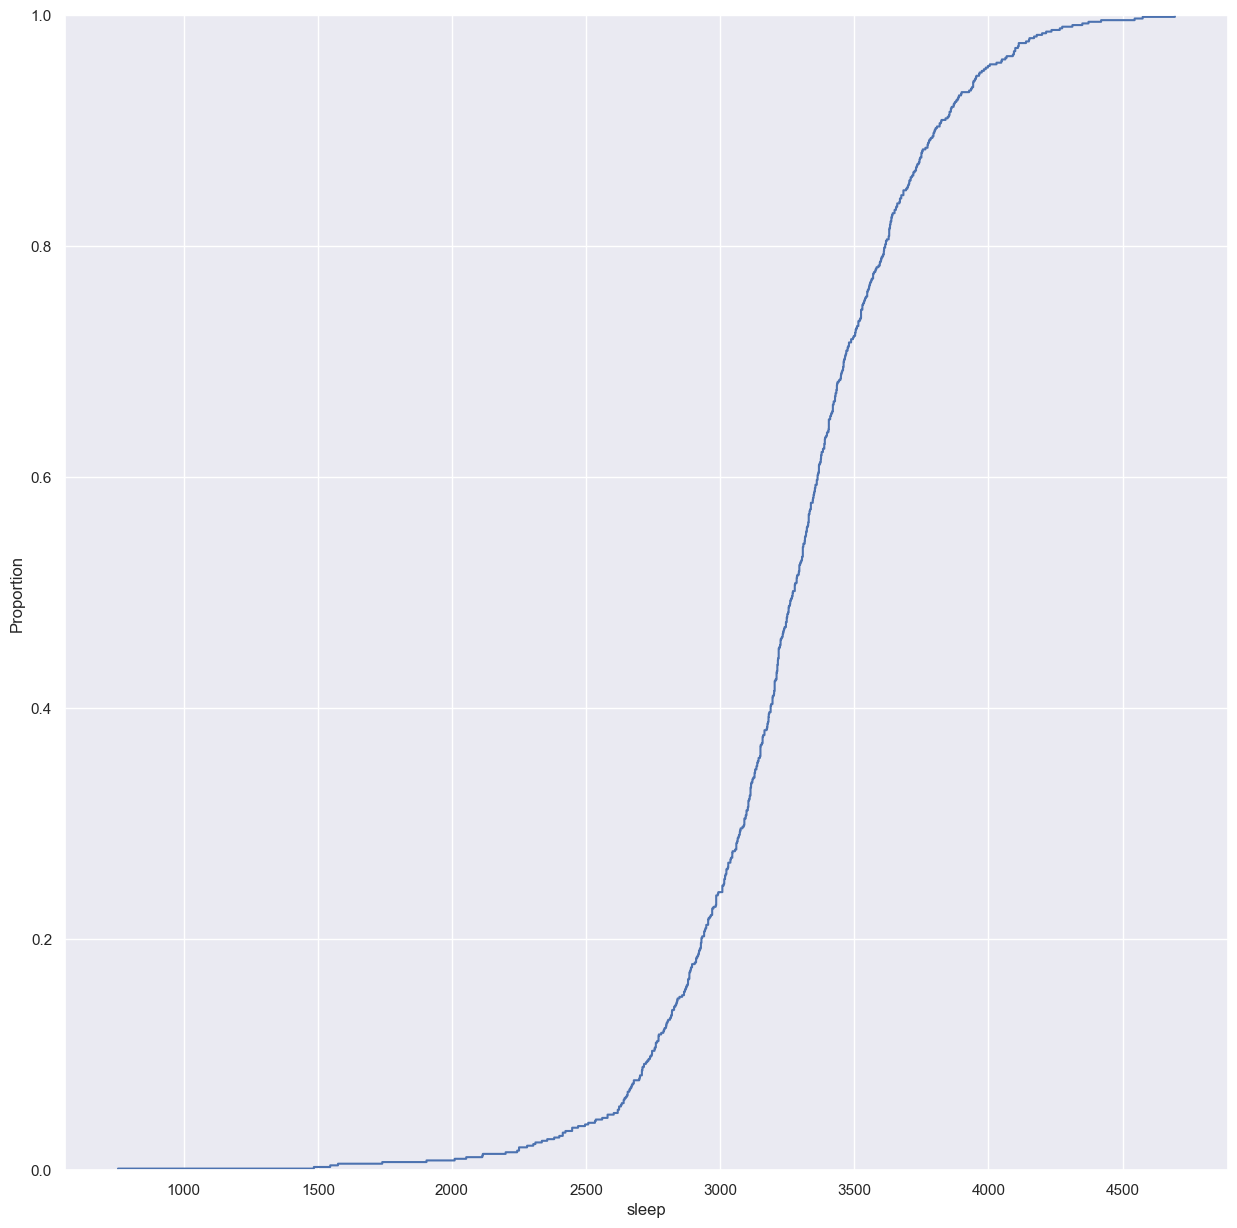

In [49]:
# Empiric distribution function for sleep
sns.ecdfplot(sleep, x='sleep');

### 2-samples Kolmogorov-Smirnov test

In [50]:
stat, p_val = scs.ks_2samp(X, Y)
stat, p_val

(0.07794117647058824, 0.22739744706319376)

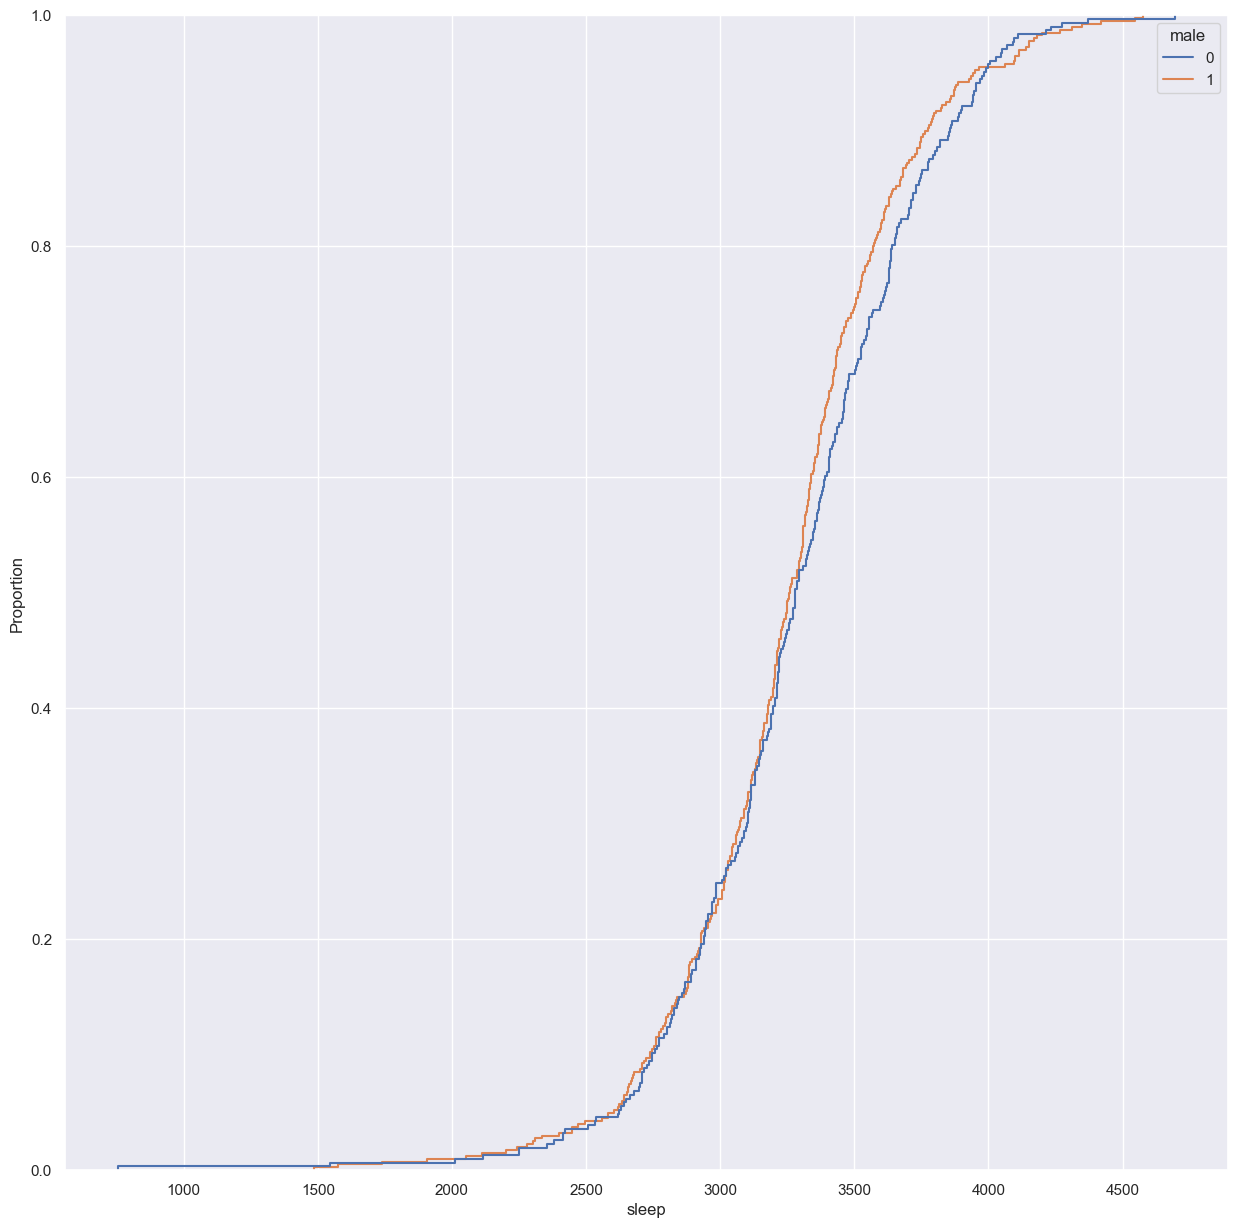

In [51]:
sns.ecdfplot(sleep, x='sleep', hue='male');

Distributed almost equal